# Locating max Sharpe Ratio portfolio

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import edhec_risk_kit as erk
from scipy.optimize import minimize

In [2]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

```python
def msr(riskfree_rate, er, cov):
    '''
    riskfree rate, er, cov -> w
    '''
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights)-1
    }
    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        '''
        returns the negative of the sharpe ratio, given weights
        '''
        r = erk.portfolio_return(weights, er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol
    
    results = minimize(neg_sharpe_ratio,
                       init_guess,
                       args=(riskfree_rate, er, cov,),
                       method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1),
                       bounds=bounds
                      )
    return results.x
```

(0, 0.1365319458381468)

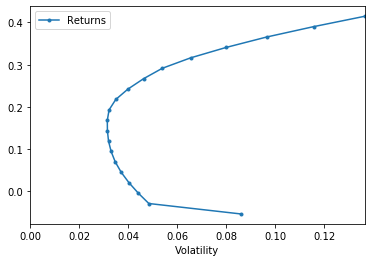

In [4]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)

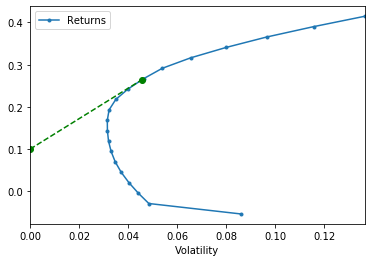

In [9]:
# with riskfree rate 10%
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)
rf = 0.1
# get msr weights first
w_msr = erk.msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)
# add capital market line with msr point
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed')

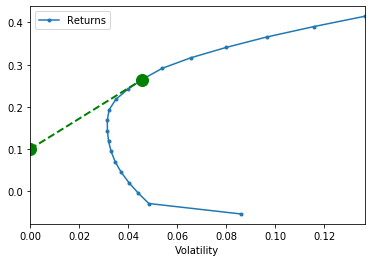

In [12]:
# from risk kit
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)